In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [3]:
import os
os.chdir("/content/mount/My Drive/ColabNotebooks")
!ls

'1.Python Assignment.ipynb'	  haberman.csv
 cleaned_strings		  Python_Mandatory_Assignment.ipynb
'Copy of Db-IMDB-Assignment.db'   Rekha-PythonAssignment.ipynb
 Db-IMDB-Assignment.db		  SQL_Assignment_Reference.ipynb
 first.ipynb			  Untitled0.ipynb


In [7]:
hb= pd.read_csv('haberman.csv')

In [14]:
# No of datapoints and no of features
print(hb.shape)

(306, 4)


In [15]:
# Feature names
print(hb.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


1. age: Age of patient at time of operation (numerical)
2. year: Patient's year of operation (year - 1900, numerical)
3. nodes: Number of positive axillary nodes detected (numerical)
4. status: Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year
Source: https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival

In [16]:
# Quick view of data
print(hb.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [17]:
#Datapoints in each class
print(hb['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


Inference:
   1) There are 225 datapoints with status 1 , meaning 225 datapoints where patients survived 5 years or longer
   2) And there are 81 datapoints with status 2, meaning 81 datapoints where unfortunately patients died within 5 years


Also its seen that Haberman is an imbalanced dataset as approximately 73% of datapoints belongs to Class 1 (status=1) and remaining 26% belongs to Class 2 (status=2)

Objective:
 Given a new patient,  predict whether he/she would survive given the new patient's age,year of operation and nodes
 

In [18]:
#creating separate dataframes for both the classes
hb_survived = hb.loc[hb["status"] == 1];
hb_died = hb.loc[hb["status"] == 2]
print(hb_survived,hb_died)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
298   73    68      0       1
300   74    63      0       1
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1

[225 rows x 4 columns]      age  year  nodes  status
7     34    59      0       2
8     34    66      9       2
24    38    69     21       2
34    39    66      0       2
43    41    60     23       2
..   ...   ...    ...     ...
286   70    58      4       2
293   72    63      0       2
299   74    65      3       2
304   78    65      1       2
305   83    58      2       2

[81 rows x 4 columns]


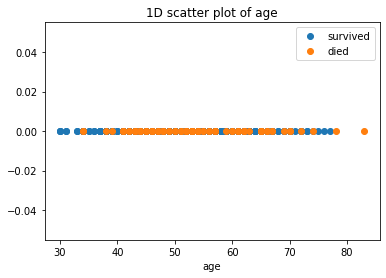

In [ ]:
# Plotting the feature age on x-axis and making all values of y-axis as zero
plt.plot(hb_survived["age"], np.zeros_like(hb_survived['age']), 'o',label='survived')
plt.plot(hb_died["age"], np.zeros_like(hb_died['age']), 'o',label='died')
plt.xlabel('age')
plt.title('1D scatter plot of age')
plt.legend()
plt.show()

1-D scatter plot seems to be difficult to interpret so let's plot Histogram to know more about how many points lie in a particular window


**Histogram**

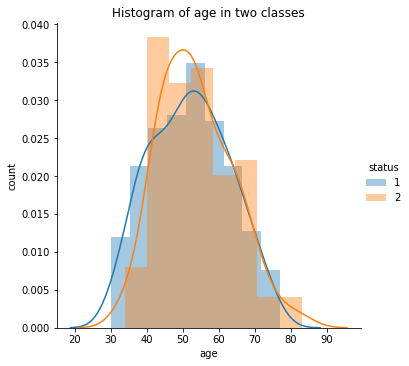

In [8]:
sns.FacetGrid(hb, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of age in two classes')
plt.xlabel('age')
plt.ylabel('count')
plt.show();

**Observation**:

*   We can see that people less than age 35 have survived compared to greater than 35 years of age.
*   Around age of 35 to 75 there is lot of overlap between survived and died class




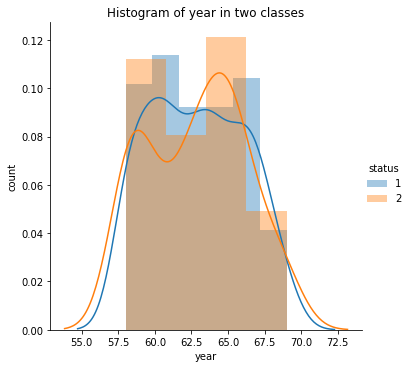

In [9]:
sns.FacetGrid(hb, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram of year in two classes')
plt.xlabel('year')
plt.ylabel('count')
plt.show();

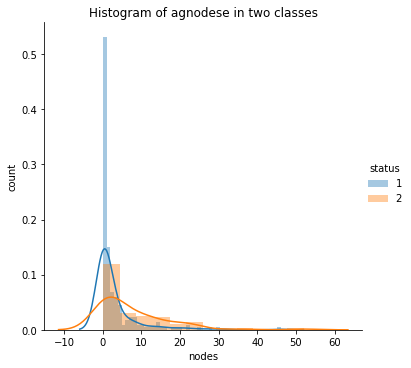

In [10]:
sns.FacetGrid(hb, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram of agnodese in two classes')
plt.xlabel('nodes')
plt.ylabel('count')
plt.show();

 Observation:
 Here , if number of nodes are greater than 30 , patients have died.And patients with nodes as 0 have mostly survived (roughly above 80%)

Conclusion from Histogram: There is lot of overlap in all histograms, nodes seems to give better inference compared to other two features

**CDF**

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


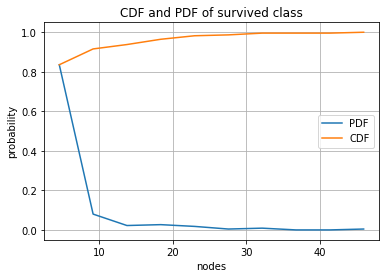

In [ ]:
#CDF of 'nodes' for survived class

counts, bin_edges = np.histogram(hb_survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# Computing CDF from PDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.title('CDF and PDF of survived class')
plt.legend()
plt.xlabel('nodes')
plt.ylabel('probability')
plt.grid()

**Inference**:
*   If number of nodes < 5 , 82% patients have survived (Class 1)
  



[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


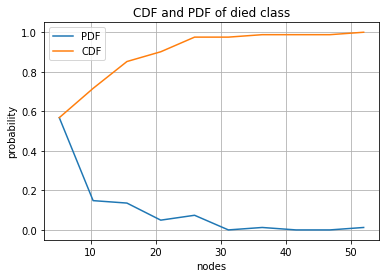

In [ ]:
# CDF of 'nodes' for died class

counts, bin_edges = np.histogram(hb_died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

# Computing CDF from PDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')

plt.title('CDF and PDF of died class')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()
plt.grid()
plt.show()

**Inference**

*  When number of nodes is greater than 25, there is 90% chance that the patient dies (Class 2)



**Boxplot**
   -- This will show the 25th,50th and 75th percentile values

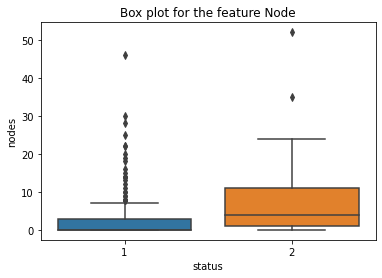

In [ ]:
sns.boxplot(x='status',y='nodes', data=hb)
plt.title('Box plot for the feature Node')
plt.show()

**Inference:**


*  When the number of nodes increase especially >5  the probability of death also increases drastically
* Also the number of nodes for patients belonging to Class 2 falls into a wider range

**Violin Plot**  -- Combines the best of Histogram and Boxplot

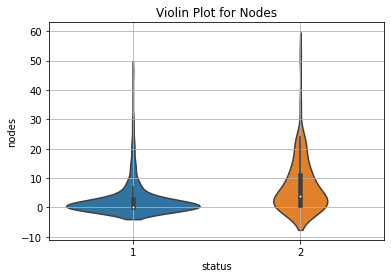

In [ ]:
sns.violinplot(x="status", y="nodes", data=hb, size=8)
plt.title("Violin Plot for Nodes")
plt.grid()
plt.show()

**Inference**:

*   The patient has a high probability of survival if the number of nodes is equal to 0
* Most of the patients who survived had 1 to 10 nodes

So as a result of Univariate analysis we can say that nodes feature is somewhat useful towards classification

**2D Scatter Plot**

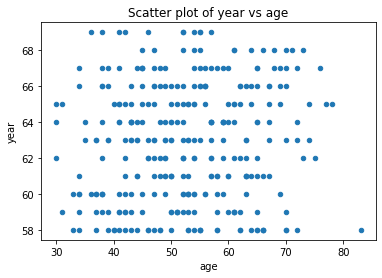

In [ ]:
hb.plot(kind='scatter', x='age', y='year') 
plt.title('Scatter plot of year vs age')
plt.show()

There is no clear separation

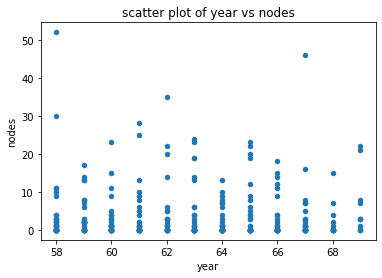

In [ ]:
hb.plot(kind='scatter', x='year', y='nodes') ;
plt.title('scatter plot of year vs nodes')
plt.show()

Again there is no clear separation observed

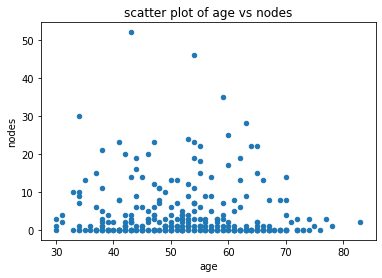

In [ ]:
hb.plot(kind='scatter', x='age', y='nodes') ;
plt.title('scatter plot of age vs nodes')
plt.show()

Some separation is observed when age and nodes is chosen

So now let's color the points by thier class-label/status.

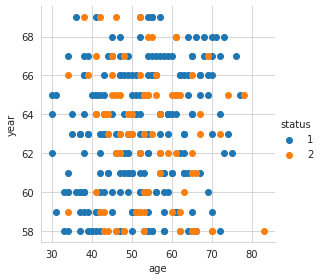

In [11]:
# 2-D Scatter plot with color-coding for each status type/class.
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();

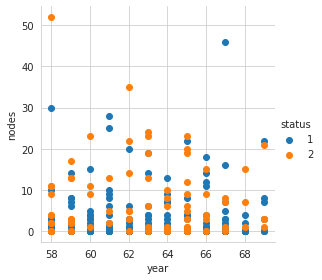

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();

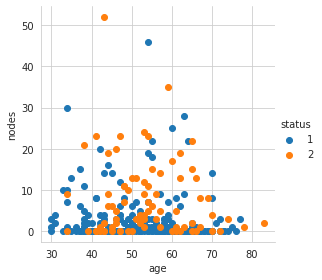

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

**Inference:**

*  When using age and nodes, there are some groups but no clear cluster



**Pair Plot**

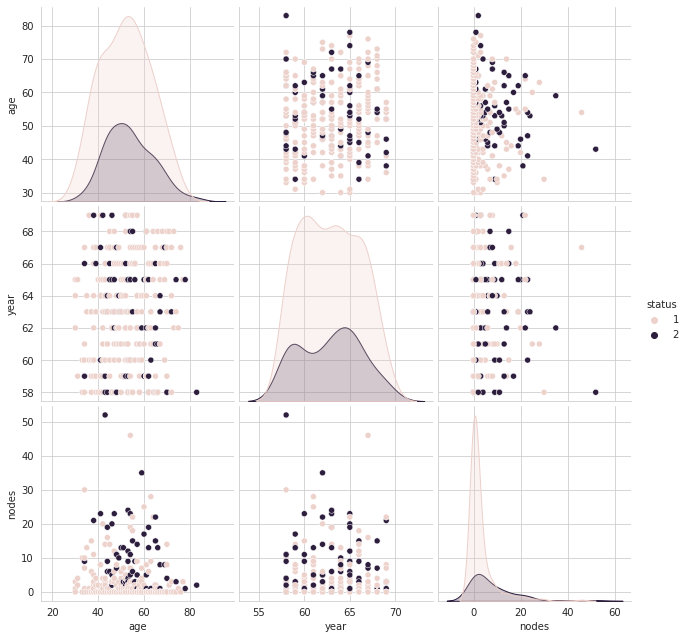

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(hb, hue="status", height=3);
plt.show()

**Inference**:

*   The degree of overlap is lower in the two classes when the feature nodes is involved
*   Nodes and age are the most useful features to predict the survival status

**Summary**

1. The dataset is imbalanced as it does not contains euqal number of data-points for each class.
2. Based on 'Nodes' we can create a simple 'if-else' model to distinguish the 2 classes but it  works for few cases only.
3. From the Box plot and Violin plot, most of the patients who survived had 1 to 10 nodes.
4. On the other hand class 2 has nodes in a wider range